# DOG BREED CLASSIFICATION

### The main objective of this project is to develop a deep learning model capable of accurately classifying dog breeds from images.
### Using Convolutional Neural Networks (CNNs), the system learns to identify distinct features and patterns of different breeds.
### The project also aims to create an interactive GUI that allows users to upload a dog image and instantly receive its predicted breed.

## About the Dataset

The dataset used in this project was downloaded from Kaggle and contains labeled images of dogs belonging to various breeds.
It consists of two main folders and a label file:

train – Contains training images organized by dog breed folders.

test – Contains test images used for prediction and evaluation.

labels.csv – A CSV file mapping image filenames to their corresponding breed labels.

The dataset includes:

10222 images from over 120 different dog breeds.

Images with variations in lighting, background, and angle to ensure real-world robustness.

Balanced classes to avoid bias during training and testing.

## Step 1: Installing Required Libraries

Before starting the project, we need to install the essential Python libraries for deep learning, data processing, and visualization.

These include:

### TensorFlow → for building and training deep learning models.

### Pandas → for handling the dataset (CSV files).

### Matplotlib → for visualizing training results and images.

### Scikit-learn → for model evaluation and preprocessing utilities.

In [1]:
pip install tensorflow pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Step 2: Importing Libraries and Loading the Dataset

In [64]:
import tensorflow as tf
import pandas as pd
import os


data_dir = r"C:\Users\drusy\OneDrive\Desktop\myprogect\dog_bread_classification\archive (8)"

# Train and test folders
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# CSV file with labels
labels_path = os.path.join(data_dir, "labels.csv")

# Load CSV
labels_df = pd.read_csv(labels_path)

print("Dataset loaded successfully!")
print(labels_df.head())


Dataset loaded successfully!
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
# Updating Image Filenames
labels_df['id'] = labels_df['id'].apply(lambda x: x + '.jpg')


## Step 4: Data Preprocessing and Data Generator Setup
This section prepares image data for training and validation using Keras’ ImageDataGenerator.

#### Imports the ImageDataGenerator class, which automatically loads images, preprocesses them, and optionally performs data augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,      
    x_col='id',              
    y_col='breed',           
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [10]:
num_classes = len(train_data.class_indices)
print(f"Number of classes: {num_classes}")
# Checking the Number of Classes

Number of classes: 120


## Data Augmentation with ImageDataGenerator

#### To make the model more robust and prevent overfitting, data augmentation techniques are applied.
#### Data augmentation creates slightly modified copies of existing images (through rotation, shifting, zooming, etc.) — allowing the model to learn from a wider variety of image variations without collecting new data.

In [12]:
from tensorflow.keras.preprocessing.image import ImageADataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [14]:
import tensorflow as tf #core framework used for building and training deep learning models.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2 #pre-trained CNN model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# Fully connected layers used for classification.
# Converts 2D feature maps into a single vector by taking the average of each feature map
# Randomly drops neurons during training to prevent overfitting and improve generalization.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import os
import matplotlib.pyplot as plt


In [16]:
train_data = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_data.class_indices)
print(f"Number of classes: {num_classes}")

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.
Number of classes: 120


## Creating and Saving Class Index Mapping
This step creates a mapping between dog breed names and their corresponding numeric class indices, and then saves that mapping in a JSON file.
This mapping is essential for decoding model predictions later — for example, converting a predicted class index back into the actual breed name.

In [3]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

# === Change this path to where your dataset actually is ===
data_dir = r"C:\Users\drusy\OneDrive\Desktop\myprogect\dog_bread_classification\archive (8)"
train_dir = os.path.join(data_dir, "train")
labels_path = os.path.join(data_dir, "labels.csv")

# === Load the labels ===
labels_df = pd.read_csv(labels_path)
labels_df['id'] = labels_df['id'].apply(lambda x: x + '.jpg')

# === Just recreate the generator — no training, just mapping ===
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# === Save mapping as JSON ===
save_path = r"C:\Users\drusy\Downloads\dog_bread\class_indices.json"
with open(save_path, "w") as f:
    json.dump(train_data.class_indices, f)

print("✅ class_indices.json saved successfully at:", save_path)


Found 8178 validated image filenames belonging to 120 classes.
✅ class_indices.json saved successfully at: C:\Users\drusy\Downloads\dog_bread\class_indices.json


## 3 Building the Deep Learning Model — MobileNetV2 for Dog Breed Classification

In [18]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# This model uses transfer learning from MobileNetV2 to efficiently classify dog breeds by reusing learned image features and fine-tuning only the final classification layers.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,411,704 (9.20 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## 4 Model Training — Fine-tuning the Dog Breed Classifier

In this step, we train the model using the **training** and **validation** datasets created earlier.  
We also use **callbacks** like *EarlyStopping* and *ReduceLROnPlateau* to make the training more efficient and prevent overfitting.

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)


C:\Users\drusy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.1708 - loss: 4.0442 - val_accuracy: 0.5465 - val_loss: 1.6822 - learning_rate: 0.0010
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.5151 - loss: 1.7868 - val_accuracy: 0.5944 - val_loss: 1.4186 - learning_rate: 0.0010
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 660s 3s/step - accuracy: 0.5945 - loss: 1.4534 - val_accuracy: 0.6169 - val_loss: 1.3690 - learning_rate: 0.0010
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - accuracy: 0.6270 - loss: 1.3121 - val_accuracy: 0.6140 - val_loss: 1.3665 - learning_rate: 0.0010
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.6376 - loss: 1.2637 - val_accuracy: 0.6248 - val_loss: 1.3193 - learning_rate: 0.0010
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 675s 3s/step - accuracy: 0.6626 - loss: 1.1810 - val_accuracy: 0.6316 - val_loss: 1.3040 - learning_rate: 0.0010
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.6685 - loss: 1.

## 5 Model Performance Visualization — Accuracy and Loss Curves

After training, it is important to **analyze the model’s performance** using graphs that show how accuracy and loss changed over time.  
This helps us understand whether the model is learning effectively or overfitting the data.


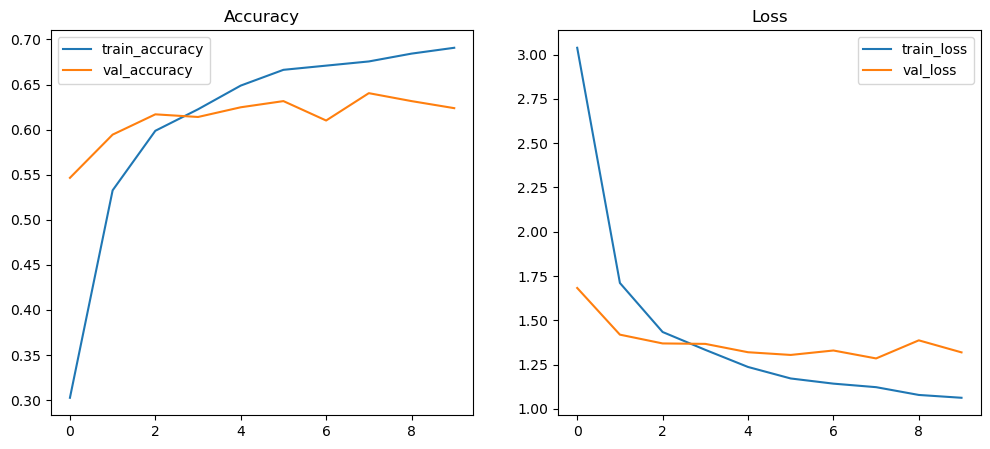

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()


## Fine-Tuning the Model — Unfreezing Top Layers for Better Accuracy

After training the model with frozen base layers, we can further improve performance by **fine-tuning** —  
that is, unfreezing some deeper layers of the pre-trained model and allowing them to learn from our dataset.

This step helps the model better adapt ImageNet features to **dog breed classification**.

In [24]:
base_model.trainable = True

# Freeze first 100 layers, fine-tune the rest
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)
#  Fine-tuning enables the model to refine high-level visual features and improve accuracy on your specific dataset.
# It’s an essential step to move from generic ImageNet features to more domain-specific dog breed recognition.

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - accuracy: 0.5532 - loss: 1.6359 - val_accuracy: 0.6443 - val_loss: 1.2614 - learning_rate: 1.0000e-05
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2406s 9s/step - accuracy: 0.6311 - loss: 1.3045 - val_accuracy: 0.6429 - val_loss: 1.2546 - learning_rate: 1.0000e-05
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 521s 2s/step - accuracy: 0.6461 - loss: 1.1884 - val_accuracy: 0.6477 - val_loss: 1.2126 - learning_rate: 1.0000e-05
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 0.6843 - loss: 1.1063 - val_accuracy: 0.6688 - val_loss: 1.1738 - learning_rate: 1.0000e-05
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.6969 - loss: 1.0343 - val_accuracy: 0.6649 - val_loss: 1.1208 - learning_rate: 1.0000e-05
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 730s 3s/step - accuracy: 0.6977 - loss: 1.0263 - val_accuracy: 0.6732 - val_loss: 1.1421 - learning_rate: 1.0000e-05
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 736s 3s/step - ac

## SAVING MODEL

In [26]:
model.save("dog_breed_classifier_120.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


## Making Predictions on Test Data — Dog Breed Identification

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Create dataframe for test images
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({'id': test_filenames})

# Create generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='id',
    y_col=None,                # No labels
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Predict
predictions = model.predict(test_data)
predicted_class_indices = np.argmax(predictions, axis=1)

# Map back to breed names
labels = list(train_data.class_indices.keys())
predicted_breeds = [labels[i] for i in predicted_class_indices]

# Save results
results_df = pd.DataFrame({
    'id': test_df['id'],
    'predicted_breed': predicted_breeds
})

results_df.to_csv('dog_breed_predictions.csv', index=False)
print("Predictions saved to dog_breed_predictions.csv")


Found 10357 validated image filenames.


C:\Users\drusy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 25/324 ━━━━━━━━━━━━━━━━━━━━ 7:52 2s/step

In [34]:
import pandas as pd

results_df = pd.read_csv("dog_breed_predictions.csv")
results_df.head()


,id,predicted_breed
0,000621fb3cbb32d8935728e48679680e.jpg,japanese_spaniel
1,00102ee9d8eb90812350685311fe5890.jpg,samoyed
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,english_setter
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,pug
4,001a5f3114548acdefa3d4da05474c2e.jpg,tibetan_terrier


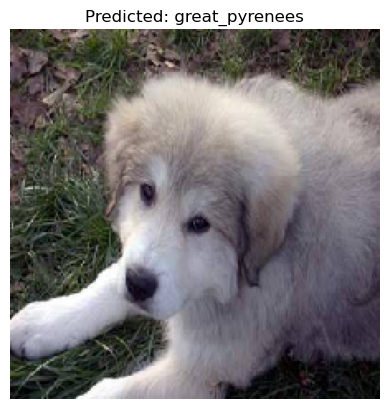

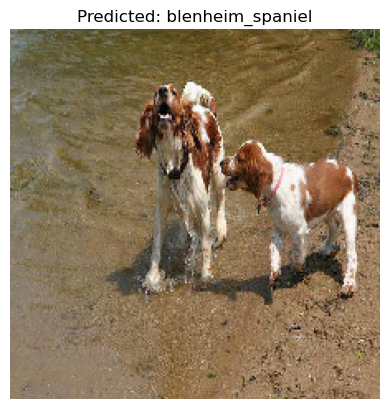

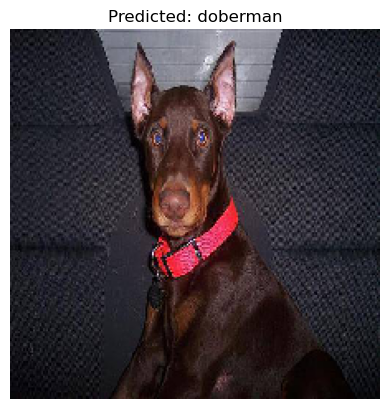

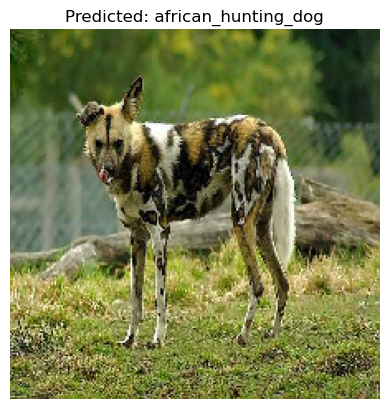

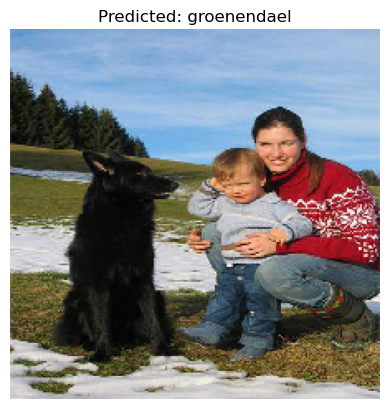

In [36]:
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing import image

sample = random.sample(range(len(results_df)), 5)

for i in sample:
    img_path = os.path.join(test_dir, results_df['id'][i])
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Predicted: {results_df['predicted_breed'][i]}")
    plt.axis("off")
    plt.show()


In [48]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")



64/64 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.6694 - loss: 1.0970
✅ Validation Accuracy: 66.14%
Validation Loss: 1.1220


In [52]:
test_dir = r"C:\Users\drusy\OneDrive\Desktop\myprogect\dog_bread_classification\archive (8)\test"

# Get all image filenames
all_images = os.listdir(test_dir)

# Pick a random image
random_image = random.choice(all_images)
random_image_path = os.path.join(r"C:\Users\drusy\OneDrive\Desktop\myprogect\dog_bread_classification\archive (8)\test\0a0b97441050bba8e733506de4655ea1.jpg")

print("Testing image:", random_image)


Testing image: 5cd694ce3209ca7ff7556c87394803c5.jpg


In [54]:

img = image.load_img(random_image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0   # Normalize
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension


In [56]:
# Predict
pred = model.predict(img_array)

# Get class index
pred_class_index = np.argmax(pred)

# Map index to breed name
labels = list(train_data.class_indices.keys())
predicted_breed = labels[pred_class_index]

print(f"Predicted Breed: {predicted_breed}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Breed: black-and-tan_coonhound


In [60]:
img_path = r"C:\Users\drusy\OneDrive\Desktop\myprogect\dog_bread_classification\images.jpg"  # Path to your Google image

# Load and resize
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array and normalize
img_array = image.img_to_array(img) / 255.0

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)


In [62]:
# Predict
pred = model.predict(img_array)

# Get predicted class
labels = list(train_data.class_indices.keys())
predicted_breed = labels[np.argmax(pred)]

print(f"Predicted Breed: {predicted_breed}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted Breed: malinois
